In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('id-date-zaman_bolumu-place.csv')
data

,device_aid,date,zaman_bolumu,Place
0,01069bba-c0ed-4999-8515-22754c3fee3e,2024-05-24,sabah,BigChefs Suadiye
1,01069bba-c0ed-4999-8515-22754c3fee3e,2024-05-24,sabah,Kahve Dünyası - Bağdat Caddesi Beyaz Köşk
2,01069bba-c0ed-4999-8515-22754c3fee3e,2024-05-24,sabah,İspark İçerenköy Açık Otoparkı
3,01069bba-c0ed-4999-8515-22754c3fee3e,2024-05-24,sabah,Caribou Coffee
4,01069bba-c0ed-4999-8515-22754c3fee3e,2024-05-24,sabah,Balık
...,...,...,...,...
2964,fa697609-b068-4af2-8d7d-c3cc53fb128a,2024-05-24,oglen,Leman Kaya İlkokulu
2965,fa697609-b068-4af2-8d7d-c3cc53fb128a,2024-05-24,sabah,Bostanci Lunapark
2966,fa697609-b068-4af2-8d7d-c3cc53fb128a,2024-05-23,oglen,Clubsporium Halı Saha
2967,fa697609-b068-4af2-8d7d-c3cc53fb128a,2024-05-24,oglen,Clubsporium Halı Saha


In [3]:
places = data["Place"].unique()
print(places)
print(len(places))

['BigChefs Suadiye' 'Kahve Dünyası - Bağdat Caddesi Beyaz Köşk'
 'İspark İçerenköy Açık Otoparkı' 'Caribou Coffee' 'Balık'
 'Özgürlük Parkı' 'Ataşehir Organik Cafe' 'Migros' 'Açık Otopark' 'Büfe'
 'Huzur Hoca Parkı' 'Muayenehane' 'Akbank' 'İETT Anadolu Garajı'
 'İstanbul Darülaceze' 'Yeditepe Üniversitesi' 'Kozyatağı Köprüsü'
 'Mozaik Çarşı' 'Özkuruşlar' '80. Yıl Cumhuriyet Parkı'
 'Uphill Court Ataşehir' '15 Temmuz Şehitler Köprüsü'
 'Göztepe 60. Yıl Parkı' 'Gül Bahçesi'
 'Yeditepe Üniversitesi Kozyatağı Hastanesi'
 'Fatih Sultan Mehmet Eğitim ve Araştırma Hastanesi' 'Çınar Parkı'
 'Geleneksel Meyhane' 'Avni Akyol Güzel Sanatlar ve Spor Lisesi'
 'Erenköy Ruh ve Sinir Hastalıkları Eğitim ve Araştırma Hastanesi'
 'Kadıköy Belediyesi Ek Hizmet Biansı'
 'Ataşehir 100. Yıl Cumhuriyet Anadolu Lisesi' 'İspark'
 'İspark Kadıköy Metro 2 Açık Otoparkı' "d'Orient | Kadıköy"
 'Ülker Stadyumu' 'Müjdat Gezen Sanat Merkezi' 'Marmara Üniversitesi'
 'Göztepe Prof. Dr. Süleyman Yalçın Şehir Hastanesi'


In [4]:
# Kategorizasyon için Kafe isimlerini alıyoruz, diğer kategorizasyonlar bir alttaki hücrede

# CSV dosyasını oku
df_kahve = pd.read_csv('Kahve_New.csv')

# Kafe isimlerinin bulunduğu sütunun adını değiştirin (ör: 'Kafe İsmi')
kafe_sutun_adi = 'isim'

# Benzersiz kafe isimlerini al
unique_kafeler = df_kahve[kafe_sutun_adi].dropna().unique()

# Sonuçları yazdır
for kafe in unique_kafeler:
    print(kafe)

del df_kahve
del kafe_sutun_adi

Arabica Coffee House Nev Çarşı
Arabicano Coffee
Best Coffee Shop Lavazza
Big Chef kahvaltı deniz manzaralı
Big Chefs - Capitol AVMŞubesi
Big Chefs - Moda TerasŞubesi
Big Chefs - Palladium AVMŞubesi
Big Chefs - Tepe NautilusŞubesi
Big Chefs -İstanbul Watergarden AVMŞubesi
Big Chefs -Şerifali QuattroŞubesi
BigChefs
BigChefs Emaar Square Mall
BigChefs Fenerbahçe
BigChefs Suadiye
Brew Crew Coffee
Cafe nero
Caffe Nero
Caribou Coffee
Caribou Coffee And Plaza
Caribou Coffee Head Office
Caribou Coffee Kalamış By Kököz
CARİBOU COFFEE METROGARDEN AVM
Coffee Beans
Coffee LAB Caddebostan
Coffee Sapiens Caddebostan
Coffee Truck
Coffee World - Optimum Istanbul
Coffeemania
Coffeemania Next | Metrogarden
Cup of Joy - Bagdat caddesi
Espresso Lab
Espressolab
Espressolab Acıbadem
Espressolab Ataşehir Golfclub
Espressolab Bağdat Caddesi
Espressolab Bostancı
Espressolab Caddebostan
Espressolab Çengelköy
Espressolab Çiftehavuzlar
Espressolab Erenköy
Espressolab Erenköy Ethemefendi
Espressolab Fikirtepe
Espr

In [5]:
#Bu Python kodu, listelediğiniz “places” değişkenindeki mekân adlarını belirttiğiniz kurallara göre başlıca
#kategorilere (Hastane, Otopark, Park, Banka, Cami, Okul, Restoran, Veteriner ve Diğer) ayırır

# Define categories and keywords
hospital_keywords = ['hastane', 'hastanesi', 'medicana', 'hospital', 'clinic', 'klinik', 'sağlık', 'saglik', 'tıp merkezi', 'tip merkezi', 'tıp hastanesi', 'tip hastanesi']
parking_keywords = ['otoparkı', 'otoparki', 'otopark']
park_keywords = ['parkı', 'parki', 'park', 'bahçe', 'bahce', 'bahcesi', 'koru', 'korusu', 'orman', 'ormanlık', 'doğa parkı', 'dogaparki', 'doğa parkı', 'dogaparki', 'rekreasyon alanı', 'rekreasyon alanı', 'piknik', 'mesire', 'mesire alanı']
bank_keywords = ['banka', 'bankası', 'bankasi', 'bank']
mosque_keywords = ['cami', 'camii', 'camisi', 'camiisi']
school_keywords = ['lise', 'ilkokul', 'ortaokul', 'anaokulu', 'okul', 'kolej', 'üniversite', 'üniversitesi', 'universite', 'üniversitesi', 'okulu', 'okulu']
cafe_keywords = ['kafe', 'cafe', 'kahve', 'çay', 'çay bahçesi', 'çaybahçesi']
market_keywords = ['market', 'bim', 'a101', 'migros', 'carrefour', 'şok', 'çarşı', 'pazar', 'özkuruşlar', 'seramik']
transport_keywords = ['yol', 'cadde', 'sokak', 'bulvar', 'avenue', 'street', 'avenue', 'boulevard', "köprü", "köprüsü", 'garaj', 'terminal', 'otogar', 'peron', 'metro', 'tramvay', 'otobüs', 'otobus', 'dolmuş', 'dolmus', 'minibüs', 'minibus', 'taksi', 'taksi durağı', 'taksi duragi', 'metrobüs', 'metrobus']
kamu_keywords = ['belediye', 'polis', 'emniyet', 'kaymakamlık']
museum_keywords = ['müze', 'museum', 'sanat galerisi', 'sanat galerisi', 'galeri', 'sergi salonu', 'sanat', 'art']
mall_keywords = ['alışveriş merkezi', 'alisveris merkezi', 'shopping mall', 'shopping center', 'outlet', 'outlet center', 'avmler', 'avm']
sport_keywords = ['spor salonu', 'fitness', 'gym', 'spor merkezi', 'spor kompleksi', 'spor tesisi', 'spor alanı', 'spor alanı', 'stadium', 'stad', 'stadyum', 'spor']

ickili_list = [
    'Modern Pub & Bistro', 'Geleneksel Meyhane', 'Yeni Nesil Meyhane', 'Pub & Bistro & Kokteyl Bar', 'Gece Kulübü',
    'Tekne-Event Hall-Catering', 'Geleneksel Birahane'
]

restaurant_list = [
    'Kebap', 'Balık', 'Fine Dining (D.Mutf-Şar.Evi)','Askeri Birlik-Sosyal Tesis',
]

veterinary_list = ['Muayenehane', 'Ev Hayvanı Satış Yeri', 'Hayvan Hastanesi']
cafe_list = unique_kafeler.tolist()

# Function to categorize a single place

def categorize(place):
    name_lower = place.lower()

    # Hospital
    if any(keyword in name_lower for keyword in hospital_keywords):
        return 'Hastane'

    # Parking (check before park)
    if any(keyword in name_lower for keyword in parking_keywords):
        return 'Otopark'

    # Park
    if any(keyword in name_lower for keyword in park_keywords):
        return 'Park'

    # Bank
    if any(keyword in name_lower for keyword in bank_keywords):
        return 'Banka'

    # Mosque
    if any(keyword in name_lower for keyword in mosque_keywords):
        return 'Cami'

    # School
    if any(keyword in name_lower for keyword in school_keywords):
        return 'Okul'
    
    # Market
    if any(keyword in name_lower for keyword in market_keywords):
        return 'Market'
    
    # Transport
    if any(keyword in name_lower for keyword in transport_keywords):
        return 'Ulaşım'
    
    # Kamu
    if any(keyword in name_lower for keyword in kamu_keywords):
        return 'Kamu Kurumu'
    
    # Museum
    if any(keyword in name_lower for keyword in museum_keywords):
        return 'Müze'
    
    # Mall
    if any(keyword in name_lower for keyword in mall_keywords):
        return 'Alışveriş Merkezi'

    # Restaurant
    if place in restaurant_list:
        return 'Restoran'
    
    # İçkili Mekanlar
    if place in ickili_list:
        return 'İçkili Mekan'

    # Veterinary
    if place in veterinary_list:
        return 'Veteriner'
    
    # Veterinary
    if place in cafe_list or any(keyword in name_lower for keyword in cafe_keywords):
        return 'Kafe'

    return 'Diğer'

# Build dictionary
categorized = {place: categorize(place) for place in places}

In [6]:
data['Place Category'] = data['Place'].apply(categorize)

In [7]:
data['Place Category'].unique()

array(['Kafe', 'Ulaşım', 'Otopark', 'Restoran', 'Park', 'Market', 'Diğer',
       'Veteriner', 'Banka', 'Okul', 'Hastane', 'İçkili Mekan',
       'Kamu Kurumu', 'Müze', 'Cami', 'Alışveriş Merkezi'], dtype=object)

In [8]:
# Zaman bölümleri
zaman_pivot = data.pivot_table(index='device_aid', columns='zaman_bolumu', 
                              values='Place', aggfunc='count', fill_value=0)

zaman_pivot

zaman_bolumu,aksam,gece,oglen,sabah
device_aid,,,,
01069bba-c0ed-4999-8515-22754c3fee3e,46,49,49,51
02712699-4a57-400b-a04a-d39bd5c8eba1,0,0,8,12
02d49c46-cfba-4bfb-9a46-5fa417c4ac6e,32,14,50,55
05e5adce-840a-430c-81d7-22a7ca96f534,0,0,4,12
0773956e-e6f8-459e-961f-ec1470c80462,0,0,2,9
...,...,...,...,...
efe3e217-cfb2-4eb9-ad1d-c2680f7fbd91,0,0,2,2
f2102cd7-f776-4adf-a782-b333a2ca8cb6,4,4,13,13
f3717295-5995-482e-ad4a-58157d2ab66c,1,16,16,7


In [9]:
# Mekan kategorileri
mekan_pivot = data.pivot_table(index='device_aid', columns='Place Category', 
                              values='Place', aggfunc='count', fill_value=0)

mekan_pivot.drop(columns='Diğer', inplace=True)
mekan_pivot

Place Category,Alışveriş Merkezi,Banka,Cami,Hastane,Kafe,Kamu Kurumu,Market,Müze,Okul,Otopark,Park,Restoran,Ulaşım,Veteriner,İçkili Mekan
device_aid,,,,,,,,,,,,,,,
01069bba-c0ed-4999-8515-22754c3fee3e,0,0,0,0,3,0,2,0,0,2,179,8,1,0,0
02712699-4a57-400b-a04a-d39bd5c8eba1,0,1,0,0,0,0,2,0,1,0,3,0,6,1,0
02d49c46-cfba-4bfb-9a46-5fa417c4ac6e,1,13,3,16,4,4,0,1,27,3,37,0,19,7,4
05e5adce-840a-430c-81d7-22a7ca96f534,0,0,0,0,1,0,0,0,3,0,4,0,1,2,3
0773956e-e6f8-459e-961f-ec1470c80462,0,0,1,1,1,1,0,0,1,0,3,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
efe3e217-cfb2-4eb9-ad1d-c2680f7fbd91,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1
f2102cd7-f776-4adf-a782-b333a2ca8cb6,8,0,1,0,4,0,0,0,1,0,7,0,1,1,4
f3717295-5995-482e-ad4a-58157d2ab66c,0,0,4,0,2,1,0,0,6,0,5,8,1,6,1


In [10]:
mekan_pivot.to_csv('mekan_pivot.csv', index=True)
zaman_pivot.to_csv('zaman_pivot.csv', index=True)

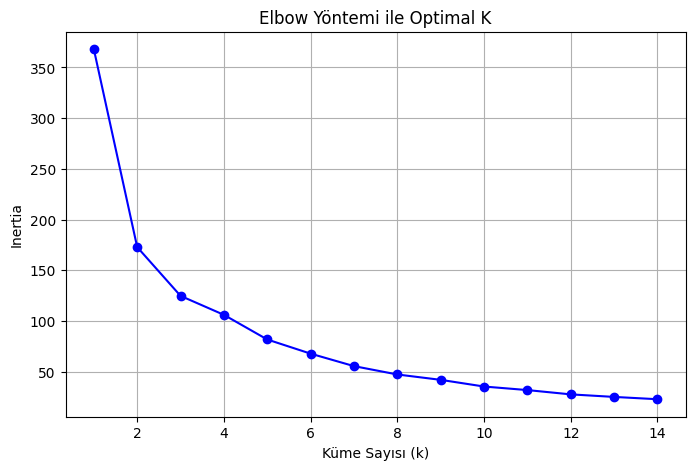

In [11]:
# Zamana göre kümeleme

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

X = zaman_pivot[["aksam", "gece", "sabah", "oglen"]]

# Normalize et (Ölçeklendirme çok önemli!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Görselleştir
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia')
plt.title('Elbow Yöntemi ile Optimal K')
plt.grid(True)
plt.show()

In [12]:
k_opt = 2  # Elbow grafiğine göre örnek olarak 3 dedik, sen grafikten karar ver
kmeans = KMeans(n_clusters=k_opt, random_state=42)
zaman_pivot['time_cluster'] = kmeans.fit_predict(X_scaled)

In [13]:
print(zaman_pivot.groupby('time_cluster').mean())

zaman_bolumu      aksam       gece      oglen      sabah
time_cluster                                            
0             27.666667  23.222222  40.111111  34.222222
1              3.228916   3.650602   7.975904   7.337349


In [14]:
# zaman_pivot 0 ise "Sık sık gezen", 1 ise "Genelde evde kalan" olarak adlandırılabilir
zaman_pivot['time_cluster'] = zaman_pivot['time_cluster'].map({0: 'Sık sık gezen', 1: 'Genelde evde kalan'})

In [15]:
def duzenli_ziyaret_edilenler(row):
    toplam = row.sum()
    if toplam == 0:
        return []
    oranlar = row / toplam
    filtered = oranlar[oranlar > ((100/15)/100)*2]
    # Oranlara göre azalan sıralama
    return filtered.sort_values(ascending=False).index.tolist()


mekan_pivot['favoriler'] = mekan_pivot.apply(duzenli_ziyaret_edilenler, axis=1)


In [16]:
mekan_pivot['favoriler']

device_aid
01069bba-c0ed-4999-8515-22754c3fee3e                                           [Park]
02712699-4a57-400b-a04a-d39bd5c8eba1                           [Ulaşım, Park, Market]
02d49c46-cfba-4bfb-9a46-5fa417c4ac6e                             [Park, Okul, Ulaşım]
05e5adce-840a-430c-81d7-22a7ca96f534            [Park, Okul, İçkili Mekan, Veteriner]
0773956e-e6f8-459e-961f-ec1470c80462                                 [Park, Restoran]
                                                            ...                      
efe3e217-cfb2-4eb9-ad1d-c2680f7fbd91          [Hastane, Park, Restoran, İçkili Mekan]
f2102cd7-f776-4adf-a782-b333a2ca8cb6    [Alışveriş Merkezi, Park, Kafe, İçkili Mekan]
f3717295-5995-482e-ad4a-58157d2ab66c                [Restoran, Okul, Veteriner, Park]
f99030ff-e47c-446a-b0ce-8dc9651a05ca                                 [Restoran, Okul]
fa697609-b068-4af2-8d7d-c3cc53fb128a                       [Park, Cami, Okul, Ulaşım]
Name: favoriler, Length: 92, dtype: object

In [17]:
# Mekan_pivot dataframe'i ile zaman_pivot dataframe'ini birleştir
mekan_zaman_pivot = pd.merge(mekan_pivot, zaman_pivot[['time_cluster']], left_index=True, right_index=True)
mekan_zaman_pivot = mekan_zaman_pivot[['favoriler', 'time_cluster']]

In [18]:
mekan_zaman_pivot

,favoriler,time_cluster
device_aid,,
01069bba-c0ed-4999-8515-22754c3fee3e,[Park],Sık sık gezen
02712699-4a57-400b-a04a-d39bd5c8eba1,"[Ulaşım, Park, Market]",Genelde evde kalan
02d49c46-cfba-4bfb-9a46-5fa417c4ac6e,"[Park, Okul, Ulaşım]",Sık sık gezen
05e5adce-840a-430c-81d7-22a7ca96f534,"[Park, Okul, İçkili Mekan, Veteriner]",Genelde evde kalan
0773956e-e6f8-459e-961f-ec1470c80462,"[Park, Restoran]",Genelde evde kalan
...,...,...
efe3e217-cfb2-4eb9-ad1d-c2680f7fbd91,"[Hastane, Park, Restoran, İçkili Mekan]",Genelde evde kalan
f2102cd7-f776-4adf-a782-b333a2ca8cb6,"[Alışveriş Merkezi, Park, Kafe, İçkili Mekan]",Genelde evde kalan
f3717295-5995-482e-ad4a-58157d2ab66c,"[Restoran, Okul, Veteriner, Park]",Genelde evde kalan


In [19]:
mekan_zaman_pivot.to_csv("id-favoriler-time_cluster.csv", index=True)